# Regression with OLS and Random Forest

In today's class we will revisit statistical regression using Craigslist rental listings, and then compare it to a machine learning approach using random forests.

In [2]:
# Startup steps
import pandas as pd, numpy as np, statsmodels.api as sm
import matplotlib.pyplot as plt, matplotlib.cm as cm, matplotlib.font_manager as fm
import matplotlib.mlab as mlab
import time, requests
from scipy.stats import pearsonr, ttest_rel
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/Users/waddell/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Estimating a Multiple Regression on Housing Rents (Hedonic Regression)##

Now let's use real data.  We use Craigslist rental listings we collected for the Bay Area.

In [3]:
rentals = pd.read_csv('data/sfrentals.csv')
rentals.columns

Index(['Unnamed: 0', 'pid', 'Unnamed: 0.1', 'date', 'region', 'neighborhood',
       'rent', 'bedrooms', 'sqft', 'rent_sqft',
       ...
       'prop_poor_500_walk', 'prop_children_1500_walk',
       'prop_singles_1500_walk', 'prop_elderly_1500_walk',
       'prop_black_1500_walk', 'prop_white_1500_walk', 'prop_asian_1500_walk',
       'prop_hisp_1500_walk', 'prop_rich_1500_walk', 'prop_poor_1500_walk'],
      dtype='object', length=109)

In [4]:
rentals.shape

(48054, 109)

In [6]:
import statsmodels.api as sm
import numpy as np
from patsy import dmatrices
y, X = dmatrices('np.log1p(rent) ~ +  np.log1p(sqft) + \
    np.log(units_500_walk+1) + np.log(sqft_unit_500_walk+2)  + \
    np.log(rich_500_walk + 1) + np.log(singles_500_walk + 1) + np.log(elderly_hh_500_walk + 1) + \
    np.log(children_500_walk + 1) + \
    np.log(jobs_500_walk + 1) + np.log(jobs_1500_walk+1) + np.log(jobs_10000+1) + np.log(jobs_25000 + 1) + \
    np.log(pop_10000+1) + np.log(pop_black_10000+1) + np.log(pop_hisp_10000+1) + \
    np.log(pop_asian_10000+1)  ', 
    data=rentals, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()
residuals = res.resid
predicted = res.fittedvalues
observed = y
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log1p(rent)   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     4068.
Date:                Sat, 17 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:59:42   Log-Likelihood:                 677.59
No. Observations:               48054   AIC:                            -1323.
Df Residuals:                   48038   BIC:                            -1183.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [7]:
data = observed.join(predicted.to_frame(name='predicted'))
data.describe()

,np.log1p(rent),predicted
count,48054.000000,48054.000000
mean,8.222217,8.222217
std,0.359482,0.268895
min,6.810142,7.150524
25%,8.006701,8.045866
50%,8.229778,8.236209
75%,8.458716,8.417545
max,9.190240,8.998957


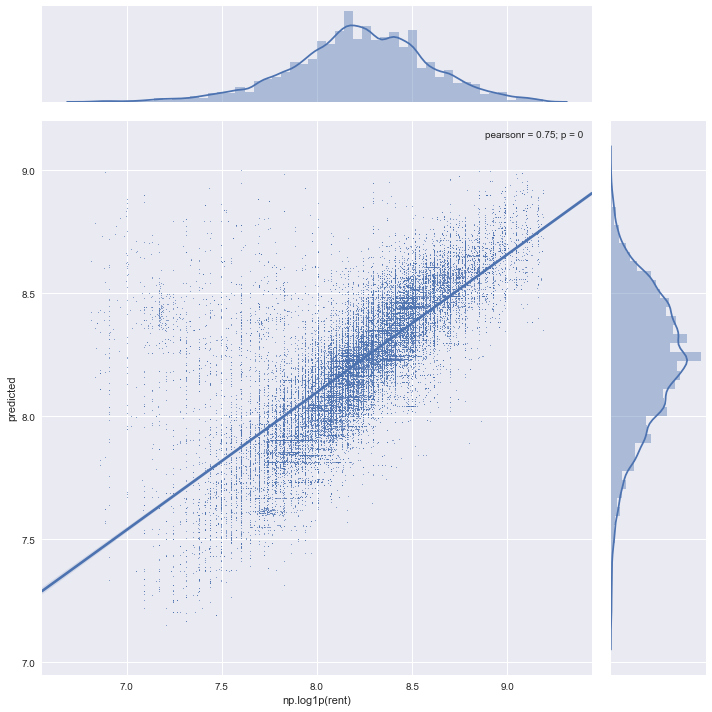

In [8]:
g = sns.jointplot("np.log1p(rent)", "predicted", data=data, kind="reg", scatter_kws={"s": 1}, size=10)

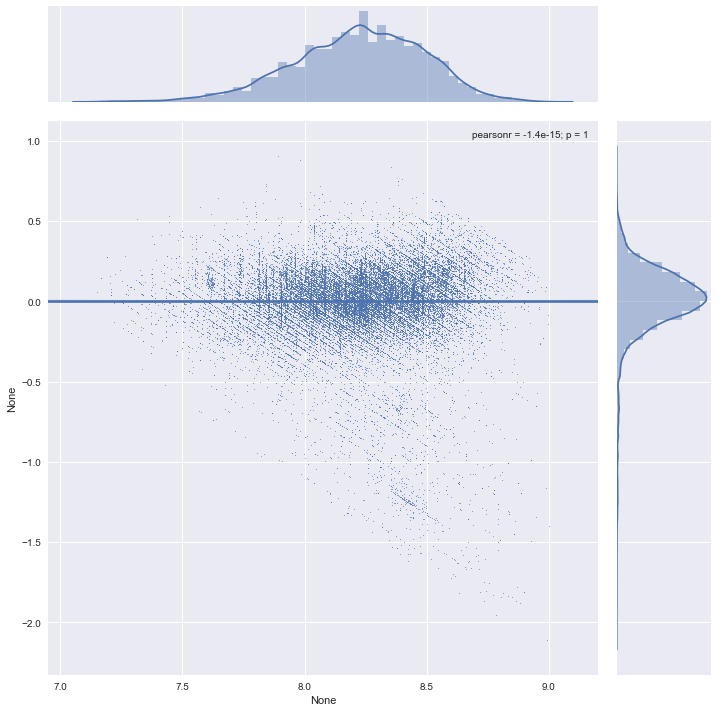

In [9]:
g = sns.jointplot(predicted, residuals, kind="reg", scatter_kws={"s": 1}, size=10)